In [6]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='data/eda.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [7]:
# Load data from logs.db
conn = sqlite3.connect('logs.db')
df = pd.read_sql_query("SELECT * FROM logs", conn)
conn.close()

logging.info('Data loaded successfully')
df.head()

,id,timestamp,level,message
0,1,2025-07-06 17:57:14,INFO,Initial log entry


In [8]:
# Basic info and null check
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1 non-null      int64 
 1   timestamp  1 non-null      object
 2   level      1 non-null      object
 3   message    1 non-null      object
dtypes: int64(1), object(3)
memory usage: 164.0+ bytes
None
         id            timestamp level            message
count   1.0                    1     1                  1
unique  NaN                    1     1                  1
top     NaN  2025-07-06 17:57:14  INFO  Initial log entry
freq    NaN                    1     1                  1
mean    1.0                  NaN   NaN                NaN
std     NaN                  NaN   NaN                NaN
min     1.0                  NaN   NaN                NaN
25%     1.0                  NaN   NaN                NaN
50%     1.0                  NaN   NaN                NaN
75%     1.0               

In [9]:
print(df.columns)


Index(['id', 'timestamp', 'level', 'message'], dtype='object')


([0], [Text(0, 0, 'INFO')])

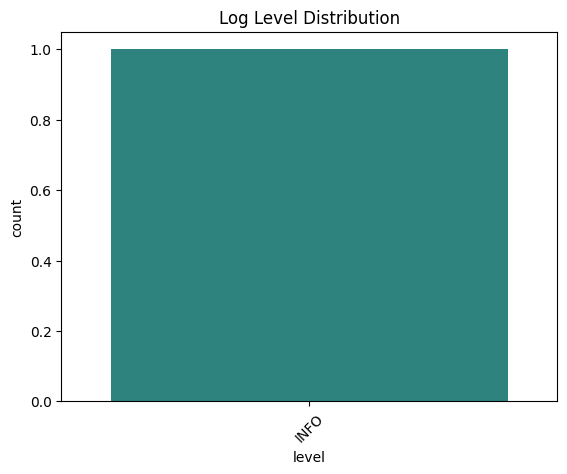

In [10]:
sns.countplot(data=df, x='level', palette='viridis')
plt.title('Log Level Distribution')
plt.xticks(rotation=45)


In [11]:
print(df.columns.tolist())


['id', 'timestamp', 'level', 'message']


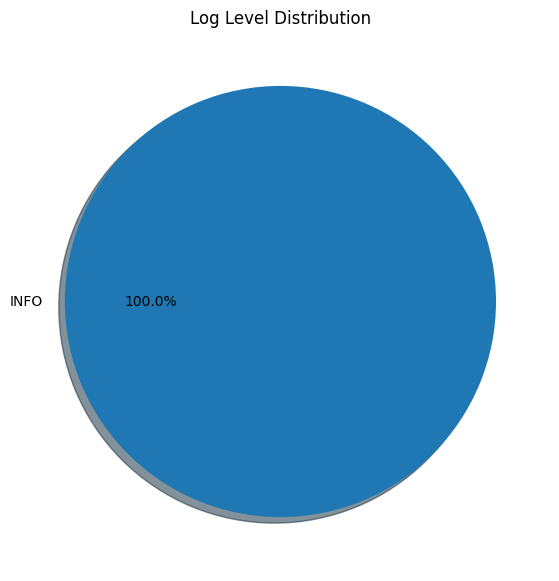

In [12]:
# For example, distribution of log levels
df['level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7), shadow=True)
plt.title('Log Level Distribution')
plt.ylabel('')
plt.show()


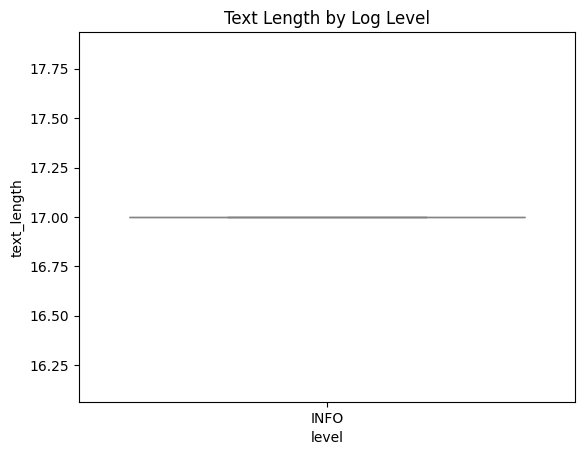

In [13]:
df['text_length'] = df['message'].apply(len)
sns.boxplot(data=df, x='level', y='text_length', palette='coolwarm')
plt.title('Text Length by Log Level')
plt.show()


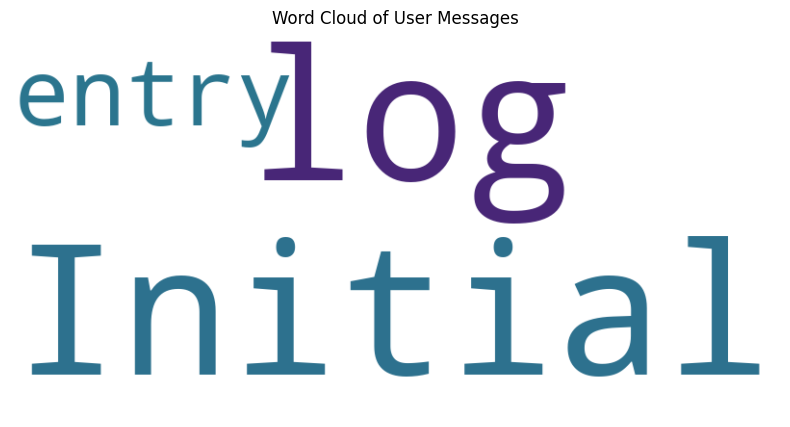

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use actual column name instead of 'user_input'
text = ' '.join(df['message'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of User Messages")
plt.show()


Device set to use cpu


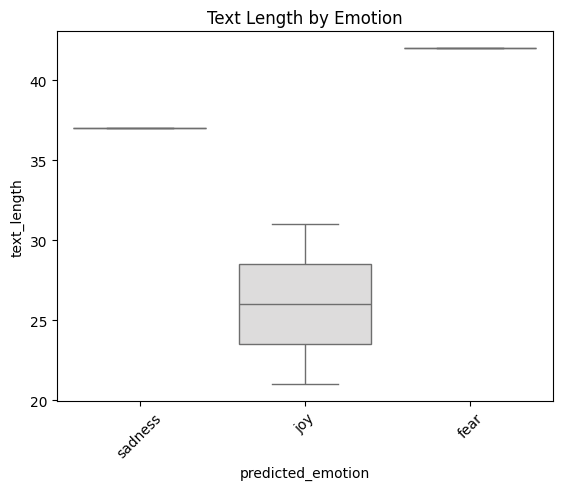

In [15]:
from transformers import pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample input
df = pd.DataFrame({
    'user_input': [
        "I'm feeling very stressed about work.",
        "Today was a good day!",
        "I'm anxious and nervous about the results.",
        "I'm relaxed and calm right now."
    ]
})

# Load classifier
classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")

# Predict emotions
df['predicted_emotion'] = df['user_input'].apply(lambda x: classifier(x)[0]['label'])

# Analyze text length
df['text_length'] = df['user_input'].apply(len)

# Plot
sns.boxplot(data=df, x='predicted_emotion', y='text_length', palette='coolwarm')
plt.title('Text Length by Emotion')
plt.xticks(rotation=45)
plt.show()


In [16]:
from collections import OrderedDict
import pandas as pd

stats = []

# Filter only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    num_stats = OrderedDict({
        'Feature': col,
        'Count': df[col].count(),
        'Minimum': df[col].min(),
        'Maximum': df[col].max(),
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Q1': df[col].quantile(0.25),
        'Q3': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
        'Standard Deviation': df[col].std(),
        'Kurtosis': df[col].kurt(),
        'Skewness': df[col].skew()
    })
    stats.append(num_stats)

report = pd.DataFrame(stats)
report


,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,text_length,4,21,42,32.75,34.0,28.5,38.25,9.75,9.032349,-0.119356,-0.68701


In [17]:
# Example structure:
df = pd.DataFrame({
    "text_length": [...],
    "label": [...]   # <- this is your target variable
})


In [19]:
import sqlite3
import pandas as pd

# Load DB
conn = sqlite3.connect("logs.db")
df = pd.read_sql_query("SELECT * FROM logs", conn)
conn.close()

# Print real column names
print("🧩 Available columns in logs table:")
print(df.columns.tolist())
print("📊 Sample rows:")
print(df.head())


🧩 Available columns in logs table:
['id', 'timestamp', 'level', 'message']
📊 Sample rows:
   id            timestamp level            message
0   1  2025-07-06 17:57:14  INFO  Initial log entry
